In [33]:

import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
df= df.drop(["Name", "PassengerId", "Cabin", "Ticket"], axis=1)
df["Sex_male"]=df["Sex_male"].astype(int)

In [32]:
df.isnull().sum()

Survived     0
Pclass       0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     2
Age_group    0
dtype: int64

In [5]:
mean_age=df["Age"].mean()

df["Age"].fillna(mean_age, inplace=True)


C:\Users\Nobukhosi\AppData\Local\Temp\ipykernel_17080\3122710453.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(mean_age, inplace=True)


Text(0, 0.5, 'Survived')

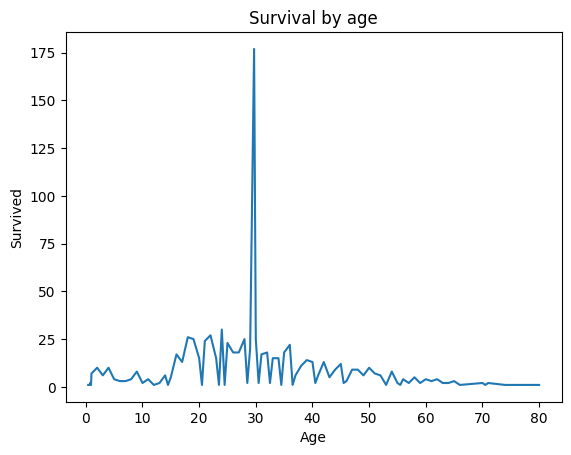

In [6]:
#Survival by age

survival_by_age= df.groupby('Age').size()
plot_age = survival_by_age.plot(title = 'Survival by age')
plot_age.set_xlabel('Age')
plot_age.set_ylabel('Survived')

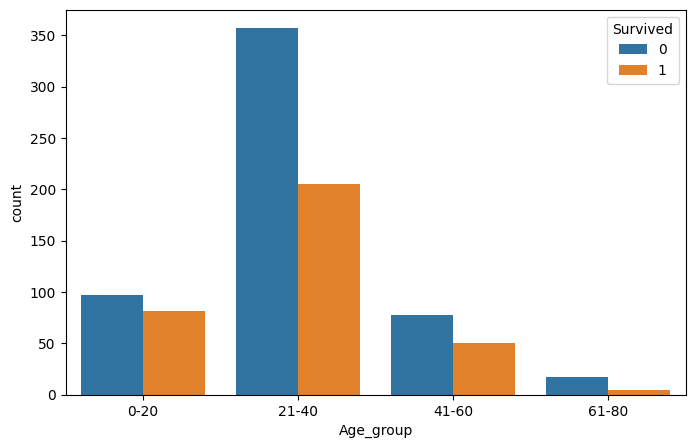

In [7]:
#survival by age
age_bins= [0,20,40, 60, 80]
df["Age_group"] = pd.cut(df["Age"], labels=['0-20','21-40','41-60','61-80'], bins=age_bins)
fig = plt.figure(figsize=(8,5))
sns.countplot(x='Age_group', hue="Survived" , data=df)
plt.show()

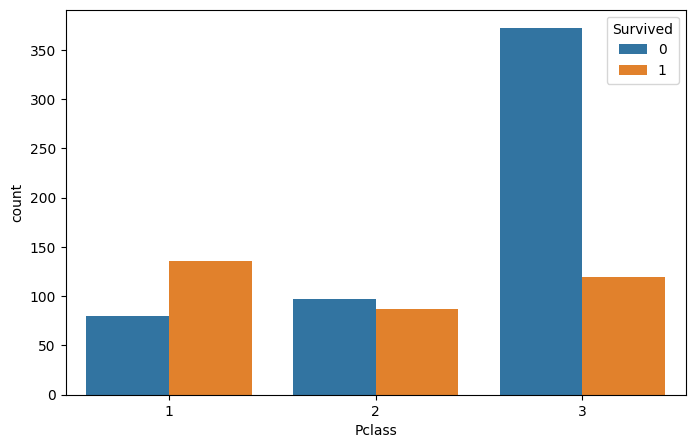

In [8]:
#Survival by Pclass
fig = plt.figure(figsize=(8,5))
sns.countplot(x='Pclass',  hue="Survived" , data=df)
plt.show()

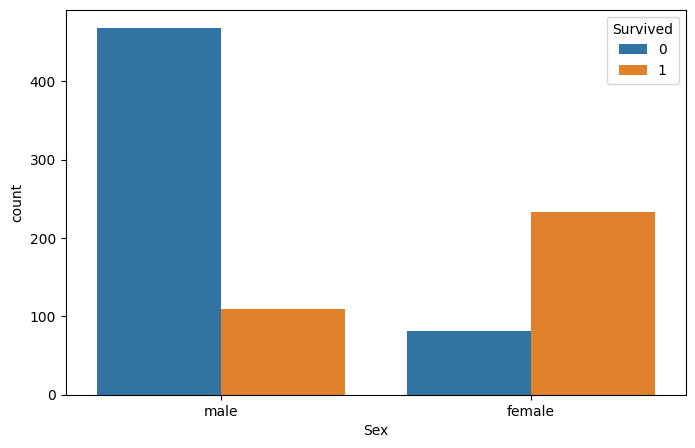

In [9]:
#Survival by gender
fig = plt.figure(figsize=(8,5))
sns.countplot(x='Sex', hue="Survived" , data=df)
plt.show()

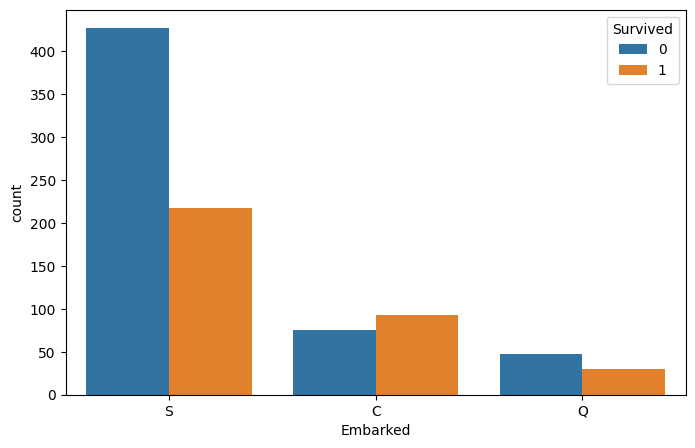

In [10]:
#Survival by embarking point
fig = plt.figure(figsize=(8,5))
sns.countplot(x='Embarked', hue="Survived" , data=df)
plt.show()

In [20]:
df_dummies=pd.get_dummies(df, drop_first=True)

In [21]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Age              891 non-null    float64
 3   SibSp            891 non-null    int64  
 4   Parch            891 non-null    int64  
 5   Fare             891 non-null    float64
 6   Sex_male         891 non-null    bool   
 7   Embarked_Q       891 non-null    bool   
 8   Embarked_S       891 non-null    bool   
 9   Age_group_21-40  891 non-null    bool   
 10  Age_group_41-60  891 non-null    bool   
 11  Age_group_61-80  891 non-null    bool   
dtypes: bool(6), float64(2), int64(4)
memory usage: 47.1 KB


In [45]:
df_dummies["Embarked_S"]=df_dummies["Embarked_S"].astype(int)
df_dummies["Embarked_Q"]=df_dummies["Embarked_Q"].astype(int)
df_dummies["Sex_male"]=df_dummies["Sex_male"].astype(int)
df_dummies.info()
df_dummies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Age              891 non-null    float64
 3   SibSp            891 non-null    int64  
 4   Parch            891 non-null    int64  
 5   Fare             891 non-null    float64
 6   Sex_male         891 non-null    int32  
 7   Embarked_Q       891 non-null    int32  
 8   Embarked_S       891 non-null    int32  
 9   Age_group_21-40  891 non-null    bool   
 10  Age_group_41-60  891 non-null    bool   
 11  Age_group_61-80  891 non-null    bool   
dtypes: bool(3), float64(2), int32(3), int64(4)
memory usage: 54.9 KB


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Age_group_21-40,Age_group_41-60,Age_group_61-80
0,0,3,22.0,1,0,7.2500,1,0,1,True,False,False
1,1,1,38.0,1,0,71.2833,0,0,0,True,False,False
2,1,3,26.0,0,0,7.9250,0,0,1,True,False,False
3,1,1,35.0,1,0,53.1000,0,0,1,True,False,False
4,0,3,35.0,0,0,8.0500,1,0,1,True,False,False


In [49]:
df_dummies= df_dummies.drop(["Age_group_21-40", "Age_group_41-60", "Age_group_61-80"], axis=1)

<Axes: >

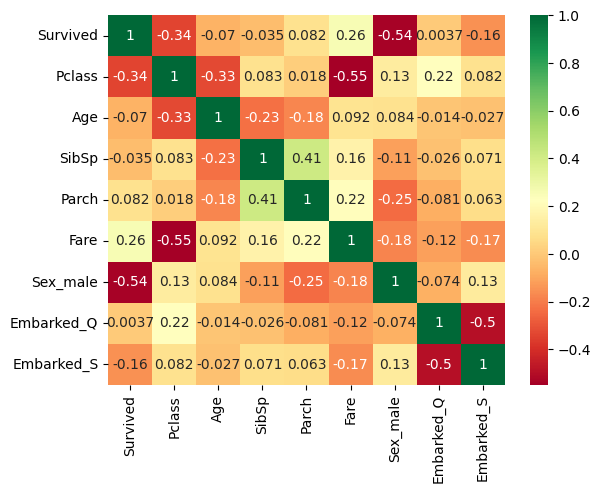

In [50]:
correlation_matrix = df_dummies.corr()
sns.heatmap(correlation_matrix, annot=True, cbar=True, cmap="RdYlGn")

In [ ]:
# Report

##most_determing_factor
The most determining factor for survival was fare.

##Prefence_according_to_class
In the data, it does not show that preference was given to the upper class as the upper class was the one that recorded the highest number of people that died when compared to other classes and it is negatively correlated to survival.
## Survival_by_age and gender 
The data indicate those aged between 20 and 40 survived more than any other age group.The higher the age, the lower the survival chances as shown by a negative correaltion between survival and age. More females survived more than males and in the correlation matrix, sex_male is negatively related to survival, meaning males had lower changes of survival than females. Therefore it can be cocluded that preference was given to women.
##Embarking_point
Passengers that embarked at point S recorded high number of survived individuals compared to other embarkation points. On other note, this point also had the highest number of deaths .